In [41]:
import geopandas as gpd

In [43]:
cropfield = gpd.read_file("https://service.pdok.nl/rvo/brpgewaspercelen/atom/v1_0/downloads/brpgewaspercelen_definitief_2020.gpkg")

In [96]:
xmin, xmax = (120000, 135000)
ymin, ymax = (485000, 500000)
cropfield_crop = cropfield.cx[xmin:xmax, ymin:ymax]

In [32]:
import pystac
from pystac_client import Client
from shapely.geometry import Point
import rioxarray
import numpy as np
import earthpy.plot as ep
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from xrspatial import zonal_stats
import xarray as xr
import geopandas as gpd
import rasterio

In [36]:
bbox = point.buffer(0.01).bounds

search = client.search(
    collections=[collection],
    bbox=bbox,
    datetime="2020-03-20/2020-03-30",
    query=["eo:cloud_cover<10"]
)
print(search.matched())

items = pystac.ItemCollection.from_file("search.json")

red_uri = items[1].assets["B04"].href
nir_uri = items[1].assets["B8A"].href

red = rioxarray.open_rasterio(red_uri, masked=True)
nir = rioxarray.open_rasterio(nir_uri, masked=True)

4


In [37]:
bbox = (629000, 5804000, 639000, 5814000)
red_clip = red.rio.clip_box(*bbox)
nir_clip = nir.rio.clip_box(*bbox)

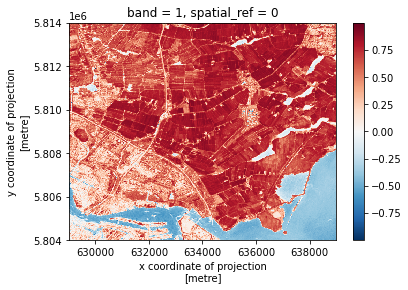

In [58]:
red_clip_matched = red_clip.rio.reproject_match(nir_clip)
ndvi = (nir_clip - red_clip_matched)/ (nir_clip + red_clip_matched)
ndvi.plot()
ndvi_sq = ndvi.squeeze()

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

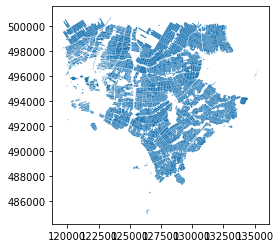

In [164]:
cropfield_crop.plot()
cropfield_crop.crs

In [165]:
cropfield_crs_raster = cropfield_crop.to_crs(ndvi.rio.crs)
cropfield_crs_raster.total_bounds

array([ 626758.92477826, 5801978.3252512 ,  642583.33625691,
       5817705.26052954])

In [98]:
ndvi_sq.rio.bounds()

(629000.0, 5804000.0, 639000.0, 5814000.0)

array([ 628604.53134349, 5804395.88652615,  639321.35371882,
       5814705.57728143])

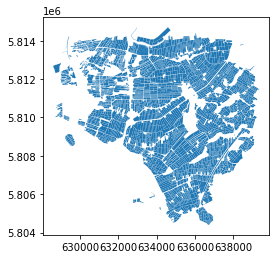

In [103]:
xmin, xmax = (629000, 639000)
ymin, ymax = (5804000, 5814000)
cropfield_crs_crop = cropfield_crs.cx[xmin:xmax, ymin:ymax]
cropfield_crs_crop.plot()
cropfield_crs_crop.total_bounds

In [136]:
cropfield_crs_crop

,category,gewas,gewascode,jaar,status,geometry
425,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((634234.009 5807461.338, 634269.560 5..."
426,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((634514.198 5807699.177, 634523.028 5..."
427,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((633115.463 5808493.238, 633116.450 5..."
428,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((634803.514 5808081.449, 634764.317 5..."
429,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((634184.289 5807370.958, 634187.042 5..."
...,...,...,...,...,...,...
770566,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((632846.409 5811358.808, 632835.050 5..."
771008,Natuurterrein,Natuurterreinen (incl. heide),335,2020,Definitief,"POLYGON ((638144.387 5808851.932, 638150.441 5..."
771192,Natuurterrein,Natuurterreinen (incl. heide),335,2020,Definitief,"POLYGON ((638761.879 5808265.992, 638772.410 5..."
771335,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((631384.726 5809352.385, 631384.854 5..."


In [151]:

#geom = [shapes for shapes in cropfield_crop.geometry]
geom = cropfield_crs_crop[['geometry', 'gewascode']].values.tolist()
geom

[[<shapely.geometry.polygon.Polygon at 0x7ff8632cc820>, 265],
 [<shapely.geometry.polygon.Polygon at 0x7ff8484d9970>, 265],
 [<shapely.geometry.polygon.Polygon at 0x7ff85895e580>, 265],
 [<shapely.geometry.polygon.Polygon at 0x7ff85b0480a0>, 265],
 [<shapely.geometry.polygon.Polygon at 0x7ff8632cce20>, 265],
 [<shapely.geometry.polygon.Polygon at 0x7ff8632ccfd0>, 265],
 [<shapely.geometry.polygon.Polygon at 0x7ff851b45130>, 265],
 [<shapely.geometry.polygon.Polygon at 0x7ff8573cb670>, 265],
 [<shapely.geometry.polygon.Polygon at 0x7ff84b7bfb20>, 265],
 [<shapely.geometry.polygon.Polygon at 0x7ff84b7bf700>, 265],
 [<shapely.geometry.polygon.Polygon at 0x7ff84ad03880>, 265],
 [<shapely.geometry.polygon.Polygon at 0x7ff871ea46a0>, 265],
 [<shapely.geometry.polygon.Polygon at 0x7ff8449adac0>, 265],
 [<shapely.geometry.polygon.Polygon at 0x7ff84c14cc10>, 265],
 [<shapely.geometry.polygon.Polygon at 0x7ff84c14c520>, 265],
 [<shapely.geometry.polygon.Polygon at 0x7ff84c14c370>, 265],
 [<shape

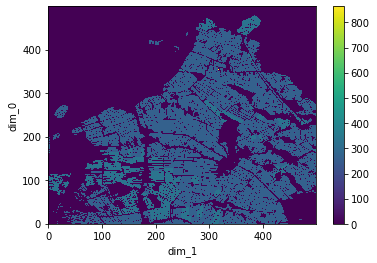

In [224]:
from rasterio import features 
cropfield_raster = rasterio.features.rasterize(geom, out_shape=ndvi_sq.shape, fill=0, transform=ndvi_sq.rio.transform())
cropfield_raster_xarr = xr.DataArray(cropfield_raster)
cropfield_raster_xarr.plot()

In [225]:
zstats = zonal_stats(cropfield_raster_xarr, ndvi_sq)
zstats

,zone,mean,max,min,sum,std,var,count
0,0,0.266531,0.999579,-0.998648,38887.648438,0.409970,0.168075,145903.0
1,259,0.520282,0.885242,0.289196,449.003052,0.111205,0.012366,863.0
2,265,0.775609,0.925955,0.060755,66478.976562,0.091089,0.008297,85712.0
3,266,0.794128,0.918048,0.544686,1037.925781,0.074009,0.005477,1307.0
4,331,0.703056,0.905304,0.142226,10725.819336,0.102255,0.010456,15256.0
5,332,0.681699,0.849158,0.178113,321.080261,0.123633,0.015285,471.0
6,335,0.648063,0.865804,0.239661,313.662598,0.146582,0.021486,484.0
7,863,0.388575,0.510572,0.185987,1.165724,0.144245,0.020807,3.0


In [226]:
import pandas as pd
code_type = cropfield_crs_crop[['gewascode', 'gewas']].drop_duplicates(ignore_index=True)
code_type_app = pd.DataFrame([[0, "non-crop"]], columns=['gewascode', 'gewas'])
code_type = pd.concat([code_type, code_type_app], ignore_index=True)
code_type = code_type.sort_values(by=['gewascode'], ignore_index=True)
code_type = code_type.drop(columns=['gewascode'])
code_type

,gewas
0,non-crop
1,"Maïs, snij-"
2,"Grasland, blijvend"
3,"Grasland, tijdelijk"
4,"Grasland, natuurlijk. Hoofdfunctie landbouw."
5,"Grasland, natuurlijk. Hoofdfunctie natuur."
6,Natuurterreinen (incl. heide)
7,Bos zonder herplantplicht


In [227]:
zstats = code_type.join(zstats)
zstats	

,gewas,zone,mean,max,min,sum,std,var,count
0,non-crop,0,0.266531,0.999579,-0.998648,38887.648438,0.409970,0.168075,145903.0
1,"Maïs, snij-",259,0.520282,0.885242,0.289196,449.003052,0.111205,0.012366,863.0
2,"Grasland, blijvend",265,0.775609,0.925955,0.060755,66478.976562,0.091089,0.008297,85712.0
3,"Grasland, tijdelijk",266,0.794128,0.918048,0.544686,1037.925781,0.074009,0.005477,1307.0
4,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,0.703056,0.905304,0.142226,10725.819336,0.102255,0.010456,15256.0
5,"Grasland, natuurlijk. Hoofdfunctie natuur.",332,0.681699,0.849158,0.178113,321.080261,0.123633,0.015285,471.0
6,Natuurterreinen (incl. heide),335,0.648063,0.865804,0.239661,313.662598,0.146582,0.021486,484.0
7,Bos zonder herplantplicht,863,0.388575,0.510572,0.185987,1.165724,0.144245,0.020807,3.0
